In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cheby import RealFunction

## Examples

In this example, we consider two functions $f$ and $g$
$$
f(x) = \sin(x)
\;,\quad
g(x) = x\exp\left(-\frac{x^2}{100}\right)
\;,
$$
defined on the range $[a,b]$ with $a=-10$ and $b=+20$.

In [2]:
a = -10
b = 20

def f(x):
    return np.sin(x)

def g(x):
    return x*np.exp(-x**2/100)

## Constructing Chebyshev representations

Chebyshev polynomials provide an efficient way to represent these functions.
$$
f(x) \simeq \tilde{f}(x) = \sum_{n=0}^{N-1} f_n \psi_n(x)
\;,\quad
g(x) \simeq \tilde{g}(x) = \sum_{n=0}^{M-1} g_n \psi_n(x)
\;,\quad\text{with }
\psi_n(x) = T_n\left( 2\frac{x-a}{b-a} - 1\right)
\;.
$$
The Chebyshev polynomials of the first kind $T_n$ are defined on the interval $[-1,1]$.
The basis functions $\psi_n$ are defined on the interval $[a,b]$ by a simple linear transformation of the argument.

The class `RealFunction` provides a convenient way to represent functions in terms of Chebyshev polynomials.
They only need a callable Python object that returns the function value, and the interval $[a;b]$ over which the Chebyshev representation is constructed.

In [3]:
ft = RealFunction(f, a, b)
gt = RealFunction(g, a, b)

The main task in constructing a Chebyshev representation is to determine a sufficient number $N$ of coefficients $f_n$ so as to ensure that the Chebyshev representation is accurate to a given tolerance.
Once the Chebyshev representation is created, we can access these coefficients through the `coef` method of the class `RealFunction`, which returns a one-dimensional `numpy` array.

The graph below shows the magnitudes of the coefficients $f_n$ and $g_n$.
It is clear that these coefficients decreases exponentially with $n$, which is expected for smooth functions.

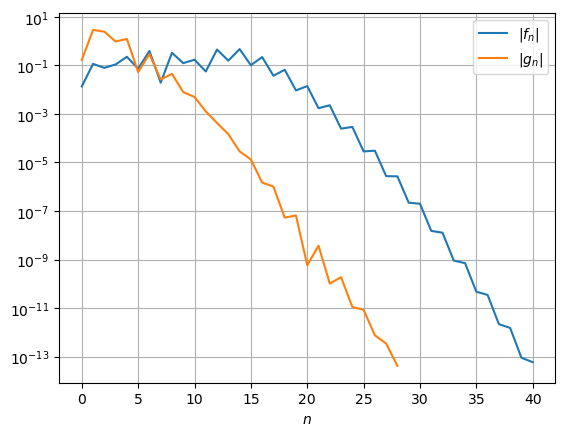

In [4]:
plt.figure()
plt.semilogy(np.abs(ft.coef()), label=r'$|f_n|$')
plt.semilogy(np.abs(gt.coef()), label=r'$|g_n|$')
plt.xlabel(r'$n$')
plt.grid()
plt.legend()
plt.show()

In fact we only need 29 coefficients to get a good approximation of the function $g$, and only 41 coefficients for the function $f$.

In [5]:
print(f'f(t): {len(ft.coef())} coefficients')
print(f'g(t): {len(gt.coef())} coefficients')

f(t): 41 coefficients
g(t): 29 coefficients


Next we compare the exact functions and their Chebyshev representations.
Instances of the class `RealFunction` can be called like a function, and return the value of the Chebyshev representation at the given point.
To evaluate $\tilde{f}(x)$ we can just write `ft(x)`.

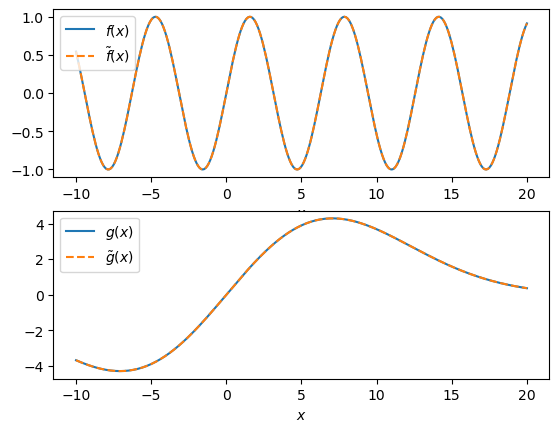

In [6]:
x = np.linspace(a, b, 300)

plt.figure()
plt.subplot(211)
plt.plot(x, f(x), label=r'$f(x)$')
plt.plot(x, ft(x), '--', label=r'$\tilde{f}(x)$')
plt.xlabel(r'$x$')
plt.legend()

plt.subplot(212)
plt.plot(x, g(x), label=r'$g(x)$')
plt.plot(x, gt(x), '--', label=r'$\tilde{g}(x)$')
plt.xlabel(r'$x$')
plt.legend()

plt.show()

The error between the exact functions and their Chebysev representations is of the order of $10^{-14}$, which is close to the machine precision.

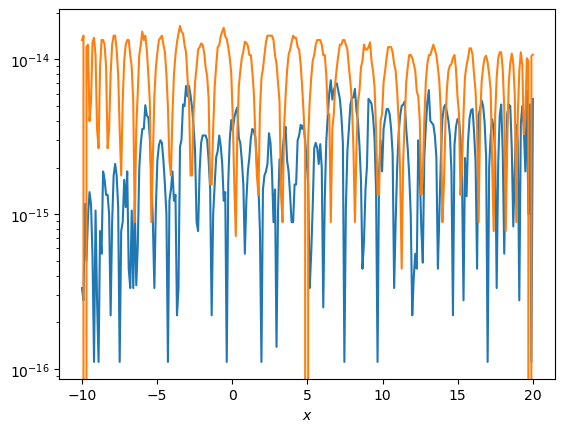

In [7]:
plt.figure()
plt.semilogy(x, np.abs(f(x) - ft(x)))
plt.semilogy(x, np.abs(g(x) - gt(x)))
plt.xlabel(r'$x$')
plt.show()

## Manipulating Chebyshev representations

Instances of the class `RealFunction` can be manipulated in a similar way as the functions they represent.
The following operations are available:
- addition, subtraction, multiplication (using the operators `+`, `-` and `*`)
- differentiation and integration (using the methods `derivative`, `primitive` and `integral`)
- integer powers (using the method `pow` or the operator `**`)
- norms (using the methods `norm_L2` and `norm_H1`)
- computing roots and extrema (using the methods `roots` and `extrema`)

For instance, to define the function
$$
h(x) = f'(x) + f(x)g(x) + g(x)^2
\;,
$$
we can directly write:

In [8]:
ht = ft.derivative() + ft*gt + gt**2

This new Chebyshev representation can then be used in the same way as the others.
Below we plot the function and the corresponding coefficients:

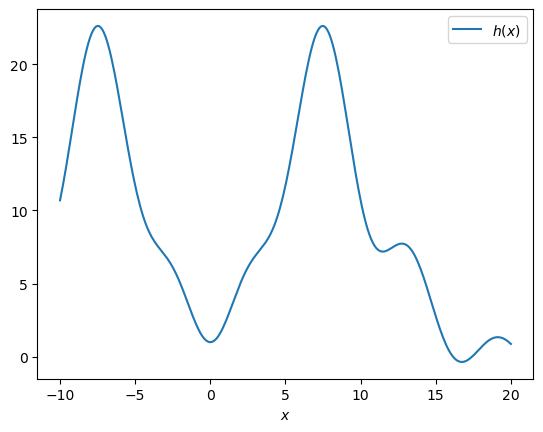

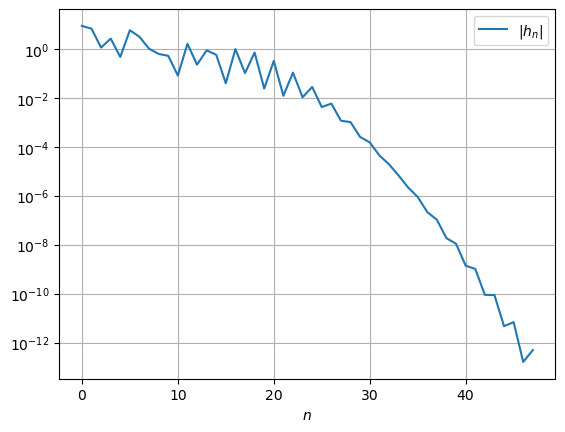

In [9]:
plt.figure()
plt.plot(x, ht(x), label=r'$h(x)$')
plt.xlabel(r'$x$')
plt.legend()

plt.figure()
plt.semilogy(np.abs(ht.coef()), label=r'$|h_n|$')
plt.xlabel(r'$n$')
plt.grid()
plt.legend()

plt.show()